<a href="https://colab.research.google.com/github/ultralytics/yolov5/blob/master/tutorial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img src="https://user-images.githubusercontent.com/26833433/82952157-51b7db00-9f5d-11ea-8f4b-dda1ffecf992.jpg">

This notebook was developed by Ultralytics LLC, and **is freely available for redistribution under the GPL-3.0 license**. For more information please visit https://github.com/ultralytics/yolov5 and https://www.ultralytics.com.

#Initial Setup

Clone repo, install dependencies, `%cd` into `./yolov5` folder and check GPU.

In [1]:
!git clone https://github.com/ultralytics/yolov5  # clone repo
!pip install -r yolov5/requirements.txt  # install dependencies
%cd yolov5
import os
import torch
from IPython.display import Image, clear_output  # to display images
from utils.google_utils import gdrive_download  # to download models/datasets

clear_output()
print('Setup complete. Using torch %s %s' % (torch.__version__, torch.cuda.get_device_properties(0) if torch.cuda.is_available() else 'CPU'))

Setup complete. Using torch 1.5.1+cu101 _CudaDeviceProperties(name='GeForce RTX 2080 Ti', major=7, minor=5, total_memory=11264MB, multi_processor_count=68)


#1. Inference

Run inference with a pretrained checkpoint on contents of `/inference/images` folder. Models are downloaded automatically from our Google Drive [folder](https://drive.google.com/open?id=1Drs_Aiu7xx6S-ix95f9kNsA6ueKRpN2J) if available.

In [16]:
!python detect.py --weights ./weights/best.pt --img 1024 --conf 0.4 --source ./inference/images/ --save-txt
Image(filename='./inference/output/zidane.jpg', width=600)

Namespace(agnostic_nms=False, augment=False, classes=None, conf_thres=0.4, device='', img_size=1024, iou_thres=0.5, output='inference/output', save_txt=True, source='./inference/images/', update=False, view_img=False, weights=['./weights/best.pt'])
Using CUDA device0 _CudaDeviceProperties(name='GeForce RTX 2080 Ti', total_memory=11264MB)
           device1 _CudaDeviceProperties(name='GeForce GTX 1050 Ti', total_memory=4096MB)

Fusing layers... Model Summary: 284 layers, 8.83906e+07 parameters, 8.45317e+07 gradients
image 1/11 inference\images\2fd875eaa.jpg: 1024x1024 26 wheats, Done. (0.056s)
image 2/11 inference\images\348a992bb.jpg: 1024x1024 35 wheats, Done. (0.046s)
image 3/11 inference\images\51b3e36ab.jpg: 1024x1024 24 wheats, Done. (0.045s)
image 4/11 inference\images\51f1be19e.jpg: 1024x1024 17 wheats, Done. (0.047s)
image 5/11 inference\images\53f253011.jpg: 1024x1024 29 wheats, Done. (0.047s)
image 6/11 inference\images\796707dd7.jpg: 1024x1024 24 wheats, Done. (0.046s)
image

FileNotFoundError: [Errno 2] No such file or directory: './inference/output/zidane.jpg'

Inference can be run on a variety of sources: images, videos, directories, webcams, rtsp and http streams as shown in the example below.

#2. Test
Test a model on COCO val or test-dev dataset to determine trained accuracy. Models are downloaded automatically from our Google Drive [folder](https://drive.google.com/open?id=1Drs_Aiu7xx6S-ix95f9kNsA6ueKRpN2J) if available. To show results by class use the `--verbose` flag. Note that `pycocotools` metrics may be 1-2% better than the equivalent repo metrics, as is visible below, due to slight differences in mAP computation.

###2.1 val2017
Download COCO val 2017 dataset, 1GB, 5000 images, and test model accuracy.

In [3]:
# Download COCO val2017
gdrive_download('1Y6Kou6kEB0ZEMCCpJSKStCor4KAReE43','coco2017val.zip')  # val2017 dataset
!mv ./coco ../  # move folder alongside /yolov5

'mv' is not recognized as an internal or external command,
operable program or batch file.


In [4]:
# Run YOLOv5s on COCO val2017
!python test.py --weights yolov5s.pt --data ./data/coco.yaml --img 640

Namespace(augment=False, batch_size=32, conf_thres=0.001, data='./data/coco.yaml', device='', img_size=640, iou_thres=0.65, merge=False, save_json=True, single_cls=False, task='val', verbose=False, weights=['yolov5s.pt'])
Using CUDA device0 _CudaDeviceProperties(name='GeForce RTX 2080 Ti', total_memory=11264MB)
           device1 _CudaDeviceProperties(name='GeForce GTX 1050 Ti', total_memory=4096MB)

Fusing layers... Model Summary: 140 layers, 7.45958e+06 parameters, 7.45958e+06 gradients
                 all       5e+03    3.63e+04       0.346       0.643       0.546       0.348



  0%|          | 0/5000 [00:00<?, ?it/s]
Caching labels ..\coco\labels\val2017.npy (2732 found, 0 missing, 24 empty, 0 duplicate, for 5000 images):  55%|#####5    | 2756/5000 [00:00<00:00, 27535.01it/s]
Caching labels ..\coco\labels\val2017.npy (4952 found, 0 missing, 48 empty, 0 duplicate, for 5000 images): 100%|##########| 5000/5000 [00:00<00:00, 27907.59it/s]

               Class      Images     Targets           P           R      mAP@.5  mAP@.5:.95:   0%|          | 0/157 [00:00<?, ?it/s]
               Class      Images     Targets           P           R      mAP@.5  mAP@.5:.95:   1%|          | 1/157 [00:16<41:37, 16.01s/it]
               Class      Images     Targets           P           R      mAP@.5  mAP@.5:.95:   1%|1         | 2/157 [00:16<29:26, 11.40s/it]
               Class      Images     Targets           P           R      mAP@.5  mAP@.5:.95:   2%|1         | 3/157 [00:17<21:06,  8.22s/it]
               Class      Images     Targets           P           R     

Speed: 3.0/2.4/5.3 ms inference/NMS/total per 640x640 image at batch-size 32

COCO mAP with pycocotools... saving detections_val2017__results.json...
loading annotations into memory...
Done (t=0.87s)
creating index...
index created!
Loading and preparing results...
DONE (t=4.83s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*
DONE (t=82.05s).
Accumulating evaluation results...
DONE (t=12.55s).
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.365
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=100 ] = 0.554
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=100 ] = 0.394
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = 0.208
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.414
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=100 ] = 0.468
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=  1 ] =

In [5]:
# Run YOLOv5x on COCO val2017
!python test.py --weights yolov5x.pt --data ./data/coco.yaml --img 640

Namespace(augment=False, batch_size=32, conf_thres=0.001, data='./data/coco.yaml', device='', img_size=640, iou_thres=0.65, merge=False, save_json=True, single_cls=False, task='val', verbose=False, weights=['yolov5x.pt'])
Using CUDA device0 _CudaDeviceProperties(name='GeForce RTX 2080 Ti', total_memory=11264MB)
           device1 _CudaDeviceProperties(name='GeForce GTX 1050 Ti', total_memory=4096MB)

Fusing layers... Model Summary: 284 layers, 8.89222e+07 parameters, 8.89222e+07 gradients
                 all       5e+03    3.63e+04       0.411       0.742       0.657       0.468
Speed: 19.6/2.1/21.7 ms inference/NMS/total per 640x640 image at batch-size 32

COCO mAP with pycocotools... saving detections_val2017__results.json...
loading annotations into memory...
Done (t=0.80s)
creating index...
index created!
Loading and preparing results...
DONE (t=3.93s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*
DONE (t=72.74s).
Accumulating eva


  0%|          | 0/5000 [00:00<?, ?it/s]
Caching labels ..\coco\labels\val2017.npy (2724 found, 0 missing, 24 empty, 0 duplicate, for 5000 images):  55%|#####4    | 2748/5000 [00:00<00:00, 27455.15it/s]
Caching labels ..\coco\labels\val2017.npy (4952 found, 0 missing, 48 empty, 0 duplicate, for 5000 images): 100%|##########| 5000/5000 [00:00<00:00, 27907.59it/s]

               Class      Images     Targets           P           R      mAP@.5  mAP@.5:.95:   0%|          | 0/157 [00:00<?, ?it/s]
               Class      Images     Targets           P           R      mAP@.5  mAP@.5:.95:   1%|          | 1/157 [00:15<40:46, 15.68s/it]
               Class      Images     Targets           P           R      mAP@.5  mAP@.5:.95:   1%|1         | 2/157 [00:16<29:07, 11.28s/it]
               Class      Images     Targets           P           R      mAP@.5  mAP@.5:.95:   2%|1         | 3/157 [00:17<21:06,  8.22s/it]
               Class      Images     Targets           P           R     

###2.2 test-dev2017
Download COCO test2017 dataset, 7GB, 40,000 images, to test model accuracy on test-dev set, 20,000 images. Results are saved to a `*.json` file which can be submitted to the evaluation server at https://competitions.codalab.org/competitions/20794.

In [6]:
# Download COCO test-dev2017
gdrive_download('1cXZR_ckHki6nddOmcysCuuJFM--T-Q6L','coco2017labels.zip')  # annotations
!f="test2017.zip" && curl http://images.cocodataset.org/zips/$f -o $f && unzip -q $f && rm $f  # 7GB,  41k images
!mv ./test2017 ./coco/images && mv ./coco ../  # move images into /coco and move /coco alongside /yolov5

'f' is not recognized as an internal or external command,
operable program or batch file.
'mv' is not recognized as an internal or external command,
operable program or batch file.


In [7]:
# Run YOLOv5s on COCO test-dev2017 with argument --task test
!python test.py --weights yolov5s.pt --data ./data/coco.yaml --task test

Namespace(augment=False, batch_size=32, conf_thres=0.001, data='./data/coco.yaml', device='', img_size=640, iou_thres=0.65, merge=False, save_json=True, single_cls=False, task='test', verbose=False, weights=['yolov5s.pt'])
Using CUDA device0 _CudaDeviceProperties(name='GeForce RTX 2080 Ti', total_memory=11264MB)
           device1 _CudaDeviceProperties(name='GeForce GTX 1050 Ti', total_memory=4096MB)

Fusing layers... Model Summary: 140 layers, 7.45958e+06 parameters, 7.45958e+06 gradients
                 all    2.03e+04           0         nan         nan         nan         nan
Speed: 3.0/2.4/5.4 ms inference/NMS/total per 640x640 image at batch-size 32

COCO mAP with pycocotools... saving detections_val2017__results.json...
loading annotations into memory...
Done (t=0.62s)
creating index...
index created!
Loading and preparing results...



  0%|          | 0/20288 [00:00<?, ?it/s]
Caching labels ..\coco\labels\test2017.npy (0 found, 0 missing, 20288 empty, 0 duplicate, for 20288 images): 100%|##########| 20288/20288 [00:00<00:00, 596168.00it/s]

               Class      Images     Targets           P           R      mAP@.5  mAP@.5:.95:   0%|          | 0/634 [00:00<?, ?it/s]
               Class      Images     Targets           P           R      mAP@.5  mAP@.5:.95:   0%|          | 1/634 [00:16<2:56:47, 16.76s/it]
               Class      Images     Targets           P           R      mAP@.5  mAP@.5:.95:   0%|          | 2/634 [00:16<2:04:19, 11.80s/it]
               Class      Images     Targets           P           R      mAP@.5  mAP@.5:.95:   0%|          | 3/634 [00:17<1:27:40,  8.34s/it]
               Class      Images     Targets           P           R      mAP@.5  mAP@.5:.95:   1%|          | 4/634 [00:17<1:02:02,  5.91s/it]
               Class      Images     Targets           P           R      mAP@.

               Class      Images     Targets           P           R      mAP@.5  mAP@.5:.95:  74%|#######3  | 469/634 [02:24<00:50,  3.30it/s]
               Class      Images     Targets           P           R      mAP@.5  mAP@.5:.95:  74%|#######4  | 470/634 [02:25<00:49,  3.30it/s]
               Class      Images     Targets           P           R      mAP@.5  mAP@.5:.95:  74%|#######4  | 471/634 [02:25<00:50,  3.22it/s]
               Class      Images     Targets           P           R      mAP@.5  mAP@.5:.95:  74%|#######4  | 472/634 [02:25<00:49,  3.29it/s]
               Class      Images     Targets           P           R      mAP@.5  mAP@.5:.95:  75%|#######4  | 473/634 [02:26<00:48,  3.32it/s]
               Class      Images     Targets           P           R      mAP@.5  mAP@.5:.95:  75%|#######4  | 474/634 [02:26<00:47,  3.34it/s]
               Class      Images     Targets           P           R      mAP@.5  mAP@.5:.95:  75%|#######4  | 475/634 [02:26<00:46,  3.

# 3. Train

Download the 128-image tutorial training dataset `./data/coco128.yaml`, start tensorboard and train a `yolov5s.yaml` model for **5 epochs**. Note that actual training is typically much longer, around **300-1000 epochs**, depending on your dataset.

In [8]:
# Download tutorial dataset coco128.yaml
gdrive_download('1n_oKgR81BJtqk75b00eAjdv03qVCQn2f','coco128.zip')  # tutorial dataset
!mv ./coco128 ../  # move folder alongside /yolov5

'mv' is not recognized as an internal or external command,
operable program or batch file.


In [3]:
!kill 11588

'kill' is not recognized as an internal or external command,
operable program or batch file.


In [4]:
# Start tensorboard
%load_ext tensorboard
%tensorboard --logdir runs

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


Reusing TensorBoard on port 6006 (pid 11588), started 2 days, 19:33:45 ago. (Use '!kill 11588' to kill it.)

Train a YOLOv5s model on the coco128 dataset by specifying model configuration file `--cfg ./models/yolo5s.yaml`, and a dataset configuration file `--data ./data/coco128.yaml`. Start training from pretrained `--weights yolov5s.pt`, or from scratch (randomly initialized weights) using `--weights ''`. Pretrained checkpoints are downloaded automatically from our Google Drive [folder](https://drive.google.com/open?id=1Drs_Aiu7xx6S-ix95f9kNsA6ueKRpN2J) if available.


In [8]:
# Train YOLOv5s on coco128 for 5 epochs
!python train.py --img 1024 --batch 2 --epochs 4 --data ./data/wheat.yaml --cfg ./models/yolov5x.yaml --weights yolov5x.pt --name tutorial

Apex recommended for faster mixed precision training: https://github.com/NVIDIA/apex
{'lr0': 0.01, 'momentum': 0.937, 'weight_decay': 0.0005, 'giou': 0.05, 'cls': 0.58, 'cls_pw': 1.0, 'obj': 1.0, 'obj_pw': 1.0, 'iou_t': 0.2, 'anchor_t': 4.0, 'fl_gamma': 0.0, 'hsv_h': 0.014, 'hsv_s': 0.68, 'hsv_v': 0.36, 'degrees': 0.0, 'translate': 0.0, 'scale': 0.5, 'shear': 0.0}
Apex recommended for faster mixed precision training: https://github.com/NVIDIA/apex
{'lr0': 0.01, 'momentum': 0.937, 'weight_decay': 0.0005, 'giou': 0.05, 'cls': 0.58, 'cls_pw': 1.0, 'obj': 1.0, 'obj_pw': 1.0, 'iou_t': 0.2, 'anchor_t': 4.0, 'fl_gamma': 0.0, 'hsv_h': 0.014, 'hsv_s': 0.68, 'hsv_v': 0.36, 'degrees': 0.0, 'translate': 0.0, 'scale': 0.5, 'shear': 0.0}
Apex recommended for faster mixed precision training: https://github.com/NVIDIA/apex
{'lr0': 0.01, 'momentum': 0.937, 'weight_decay': 0.0005, 'giou': 0.05, 'cls': 0.58, 'cls_pw': 1.0, 'obj': 1.0, 'obj_pw': 1.0, 'iou_t': 0.2, 'anchor_t': 4.0, 'fl_gamma': 0.0, 'hsv_h'


  0%|          | 0/3422 [00:00<?, ?it/s]
Caching labels ..\data\labels\train.npy (2093 found, 0 missing, 27 empty, 0 duplicate, for 3422 images):  62%|######1   | 2120/3422 [00:00<00:00, 21180.68it/s]
Caching labels ..\data\labels\train.npy (3373 found, 0 missing, 49 empty, 0 duplicate, for 3422 images): 100%|##########| 3422/3422 [00:00<00:00, 21368.03it/s]

  0%|          | 0/3422 [00:00<?, ?it/s]
Caching labels ..\data\labels\train.npy (2097 found, 0 missing, 27 empty, 0 duplicate, for 3422 images):  62%|######2   | 2124/3422 [00:00<00:00, 21220.74it/s]
Caching labels ..\data\labels\train.npy (3373 found, 0 missing, 49 empty, 0 duplicate, for 3422 images): 100%|##########| 3422/3422 [00:00<00:00, 21368.03it/s]

  0%|          | 0/1711 [00:00<?, ?it/s]
       0/3     7.85G    0.1252    0.2264         0    0.3516       132      1024:   0%|          | 0/1711 [00:03<?, ?it/s]
       0/3     7.85G    0.1252    0.2264         0    0.3516       132      1024:   0%|          | 1/1711 [00:0

#4. Visualize

After training starts, view `train*.jpg` images to see training images, labels and augmentation effects. Note a mosaic dataloader is used for training (shown below), a new dataloading concept developed by Ultralytics and first featured in [YOLOv4](https://arxiv.org/abs/2004.10934).

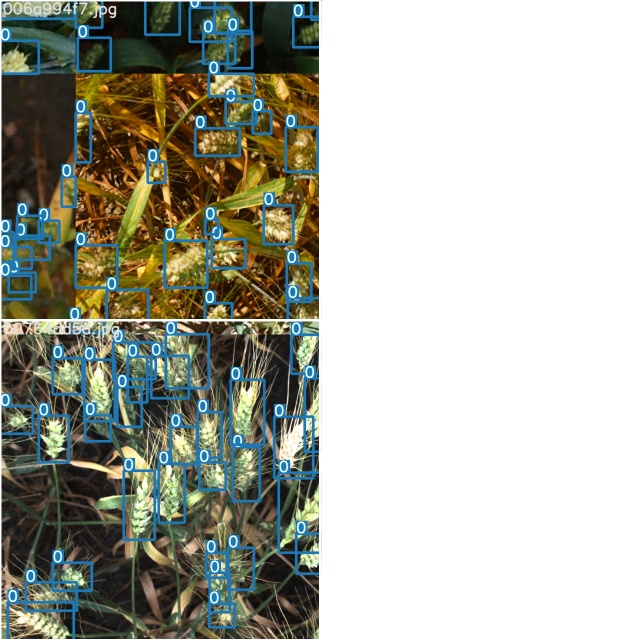

In [9]:
Image(filename='./train_batch1.jpg', width=900)  # view augmented training mosaics

View `test_batch0_gt.jpg` to see test batch 0 ground truth labels.

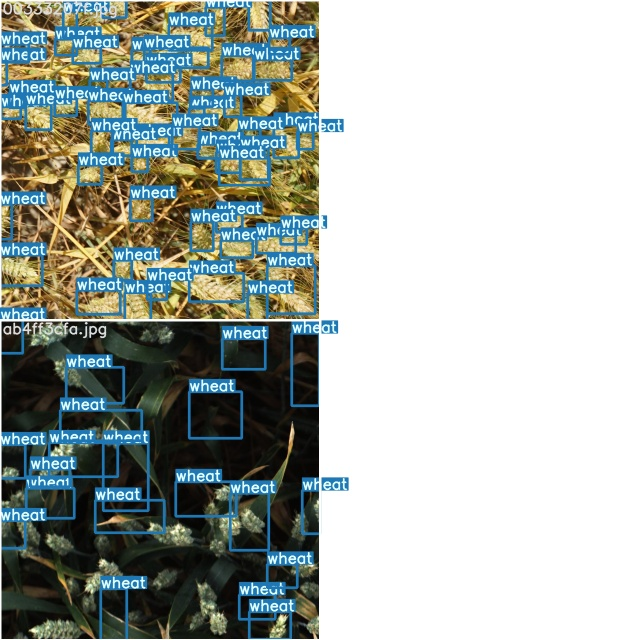

In [10]:
Image(filename='./test_batch0_gt.jpg', width=900)  # view test image labels

View `test_batch0_pred.jpg` to see test batch 0 predictions.

In [ ]:
Image(filename='./test_batch0_pred.jpg', width=900)  # view test image predictions

Training losses and performance metrics are saved to Tensorboard and also to a `results.txt` logfile. `results.txt` is plotted as `results.png` after training completes. Partially completed `results.txt` files can be plotted with `from utils.utils import plot_results; plot_results()`. Here we show YOLOv5s trained on coco128 to 100 epochs, starting from scratch (orange), and starting from pretrained `yolov5s.pt` weights (blue).

In [ ]:
from utils.utils import plot_results; plot_results()  # plot results.txt as results.png
Image(filename='./results.png', width=1000)  # view results.png

## 5. Appendix

In [ ]:
# Re-clone
%cd ..
!rm -rf yolov5 && git clone https://github.com/ultralytics/yolov5
%cd yolov5

In [ ]:
# Apex install
!git clone https://github.com/NVIDIA/apex && cd apex && pip install -v --no-cache-dir --global-option="--cpp_ext" --global-option="--cuda_ext" . --user && cd .. && rm -rf apex

In [ ]:
# Test GCP checkpoint on COCO val2017
%%shell
x=best*.pt
gsutil cp gs://*/*/weights/$x .
python test.py --weights $x --data ./data/coco.yaml --img 736

In [ ]:
# Test multiple models on COCO val2017
%%shell
for x in yolov5s yolov5m yolov5l yolov5x
do 
  python test.py --weights $x.pt --data ./data/coco.yaml --img 640 --conf 0.001
done